In [1]:
from urllib.request import urlopen 
from zipfile import ZipFile 
from io import BytesIO
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
z = urlopen("https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist.zip") 
myzip = ZipFile(BytesIO(z.read())).extract('eurofxref-hist.csv') 
df = pd.read_csv(myzip)
df.head()


,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2023-04-28,1.0981,149.35,1.9558,NaN,23.502,7.4538,NaN,0.88050,373.78,...,89.8555,1470.89,19.8182,4.8981,1.7864,60.923,1.4679,37.467,20.1558,NaN
1,2023-04-27,1.1042,147.16,1.9558,NaN,23.512,7.4538,NaN,0.88428,373.58,...,90.3185,1480.87,20.0182,4.9280,1.7940,61.526,1.4749,37.664,20.1452,NaN
2,2023-04-26,1.1039,147.67,1.9558,NaN,23.477,7.4534,NaN,0.88560,375.83,...,90.2465,1476.66,19.9388,4.9201,1.8032,61.454,1.4745,37.731,20.3080,NaN
3,2023-04-25,1.1022,147.91,1.9558,NaN,23.476,7.4530,NaN,0.88645,375.42,...,90.3310,1475.70,19.8039,4.9046,1.7887,61.205,1.4735,37.949,20.1501,NaN
4,2023-04-24,1.1002,148.17,1.9558,NaN,23.439,7.4530,NaN,0.88463,375.15,...,90.1255,1468.59,19.8331,4.8821,1.7916,61.336,1.4684,37.858,19.9476,NaN


In [2]:
df.dropna(axis=1, inplace=True)
df['Date'] = df['Date'].astype('datetime64[ns]')
df.sort_values(by='Date',inplace=True)
df.reset_index(drop=True,inplace=True)
df = df.set_index('Date')
df.head()

,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
Date,,,,,,,,,,,,,,,,,
1999-01-04,1.1789,133.73,35.107,7.4501,0.71110,251.48,4.0712,9.4696,1.6168,8.8550,1.9100,1.8004,9.1332,1398.59,2.2229,1.9554,6.9358
1999-01-05,1.1790,130.96,34.917,7.4495,0.71220,250.80,4.0245,9.4025,1.6123,8.7745,1.8944,1.7965,9.1341,1373.01,2.2011,1.9655,6.7975
1999-01-06,1.1743,131.42,34.850,7.4452,0.70760,250.67,4.0065,9.3050,1.6116,8.7335,1.8820,1.7711,9.1010,1359.54,2.1890,1.9699,6.7307
1999-01-07,1.1632,129.43,34.886,7.4431,0.70585,250.09,4.0165,9.1800,1.6165,8.6295,1.8474,1.7602,9.0131,1337.16,2.1531,1.9436,6.8283
1999-01-08,1.1659,130.09,34.938,7.4433,0.70940,250.15,4.0363,9.1650,1.6138,8.5900,1.8406,1.7643,9.0302,1366.73,2.1557,1.9537,6.7855


In [3]:
list_clm = list(df.columns)
df_benchmark = pd.DataFrame(columns=list_clm)
df_benchmark = df.apply(lambda x: 1/x)

df_benchmark.head()

,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
Date,,,,,,,,,,,,,,,,,
1999-01-04,0.848248,0.007478,0.028484,0.134226,1.406272,0.003976,0.245628,0.105601,0.618506,0.112931,0.523560,0.555432,0.109491,0.000715,0.449863,0.511404,0.144179
1999-01-05,0.848176,0.007636,0.028639,0.134237,1.404100,0.003987,0.248478,0.106355,0.620232,0.113967,0.527872,0.556638,0.109480,0.000728,0.454318,0.508776,0.147113
1999-01-06,0.851571,0.007609,0.028694,0.134315,1.413228,0.003989,0.249594,0.107469,0.620501,0.114502,0.531350,0.564621,0.109878,0.000736,0.456830,0.507640,0.148573
1999-01-07,0.859697,0.007726,0.028665,0.134353,1.416732,0.003999,0.248973,0.108932,0.618620,0.115882,0.541301,0.568117,0.110950,0.000748,0.464447,0.514509,0.146449
1999-01-08,0.857706,0.007687,0.028622,0.134349,1.409642,0.003998,0.247752,0.109111,0.619655,0.116414,0.543301,0.566797,0.110740,0.000732,0.463886,0.511849,0.147373


In [4]:
list_clm = list(df_benchmark.columns)
df_log_returns = pd.DataFrame(columns=list_clm)
df_log_returns = df_benchmark.apply(np.log).diff()

df_log_returns.head()


,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
Date,,,,,,,,,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,-0.000085,0.020931,0.005427,0.000081,-0.001546,0.002708,0.011537,0.007111,0.002787,0.009132,0.008201,0.002169,-0.000099,0.018459,0.009855,-0.005152,0.020142
1999-01-06,0.003994,-0.003506,0.001921,0.000577,0.006480,0.000518,0.004483,0.010424,0.000434,0.004684,0.006567,0.014240,0.003630,0.009859,0.005512,-0.002236,0.009876
1999-01-07,0.009497,0.015258,-0.001032,0.000282,0.002476,0.002316,-0.002493,0.013525,-0.003036,0.011980,0.018556,0.006173,0.009705,0.016598,0.016536,0.013441,-0.014397
1999-01-08,-0.002318,-0.005086,-0.001489,-0.000027,-0.005017,-0.000240,-0.004918,0.001635,0.001672,0.004588,0.003688,-0.002327,-0.001895,-0.021873,-0.001207,-0.005183,0.006288


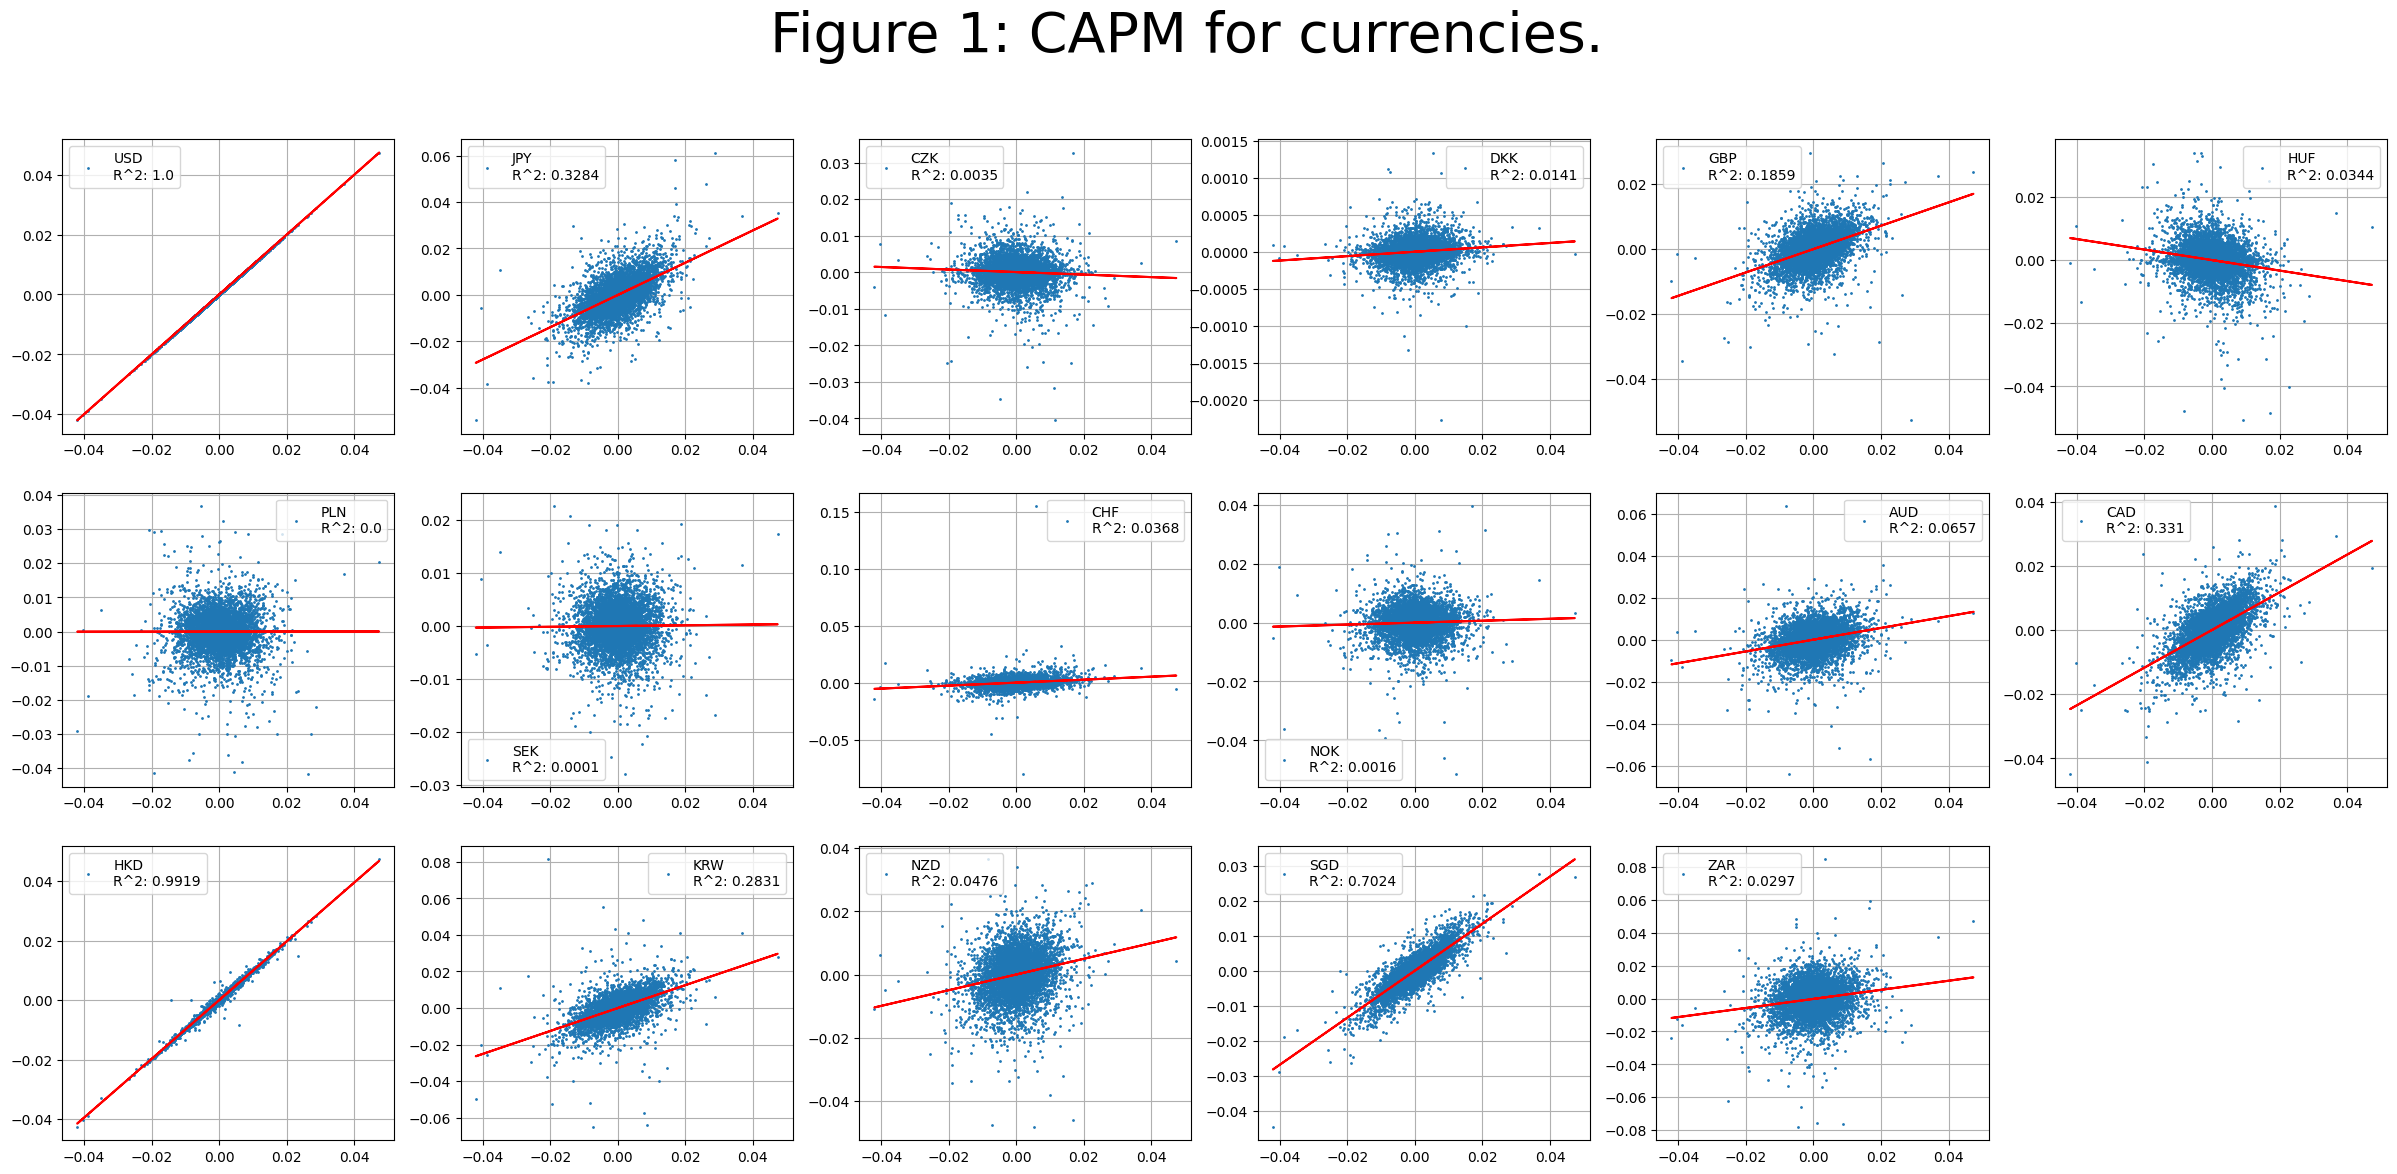

In [5]:
#######
## CAPM in one figure
#######

fig, axs = plt.subplots(3,6, figsize=(30,13))
fig.suptitle('Figure 1: CAPM for currencies.', fontsize=40)
axs[2,5].remove()

j = 0
k = 0

for i, val in enumerate(list_clm):

    if (i) %6 == 0: 
        j+=1
        k=0
    
    model = smf.ols(formula= f"{val} ~ USD", data = df_log_returns).fit()

    axs[j-1,k].plot(df_log_returns['USD'], df_log_returns[val], '.', ms=2, label=f'{val}\nR^2: {round(model.rsquared,4)}')
    axs[j-1,k].plot(df_log_returns['USD'][1:], model.fittedvalues, color='r', linestyle='-')

    axs[j-1,k].legend()
    axs[j-1,k].grid()

    k+=1


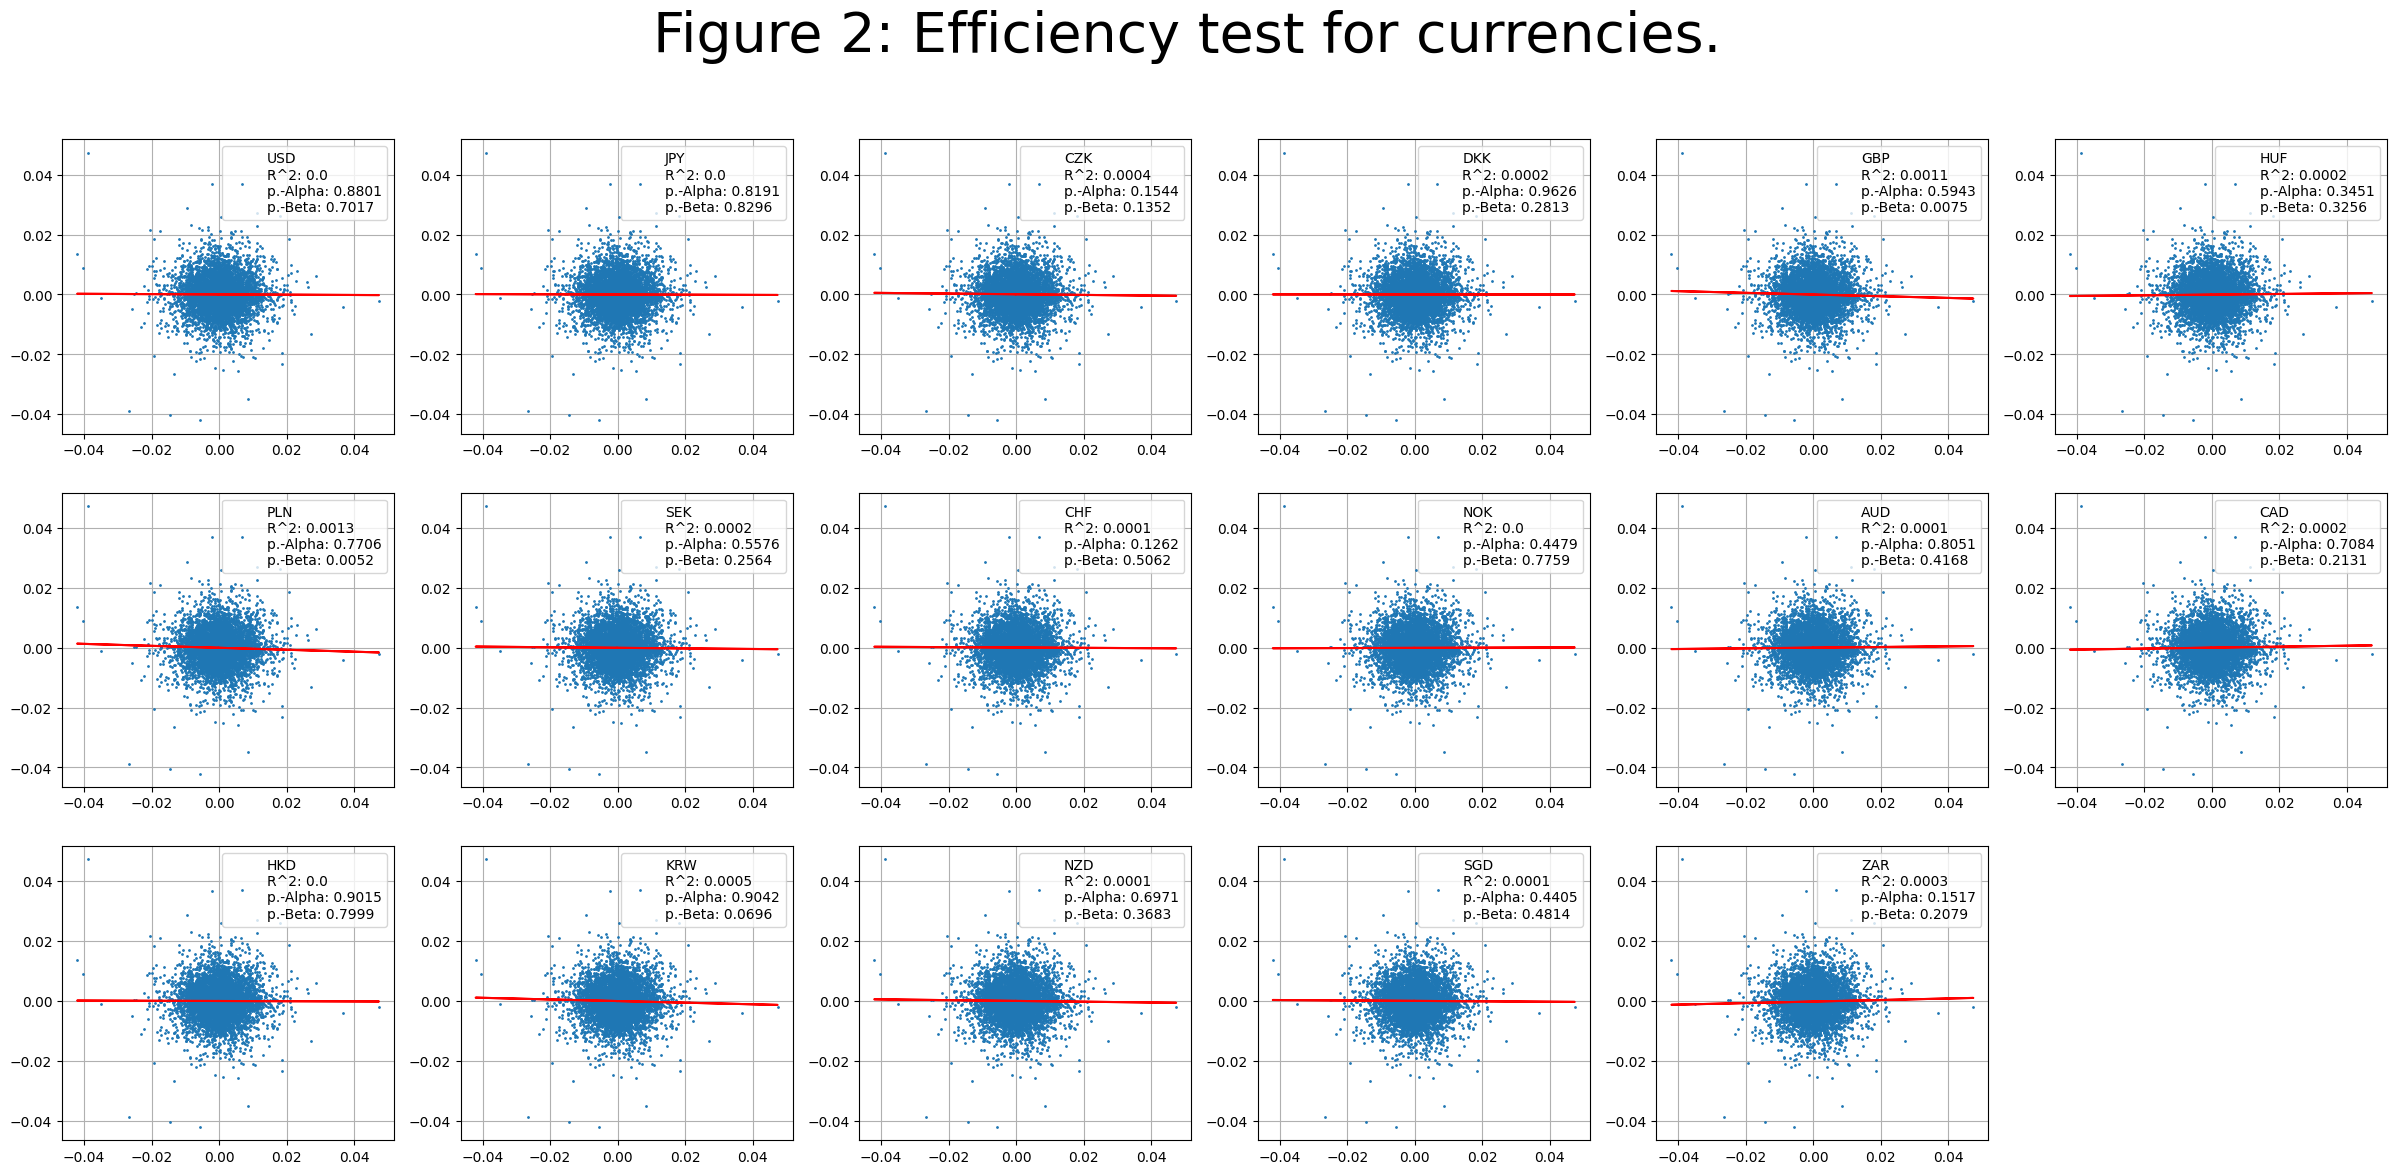

In [6]:
df_log_returns['USD_lag'] = df_log_returns['USD'].shift(1)

fig, axs = plt.subplots(3,6, figsize=(30,13))
fig.suptitle('Figure 2: Efficiency test for currencies.', fontsize=40)
axs[2,5].remove()

j = 0
k = 0

for i, val in enumerate(list_clm):

    if (i) %6 == 0: 
        j+=1
        k=0
     
    model1 = smf.ols(formula = f'{val} ~ USD_lag', data = df_log_returns).fit()

    axs[j-1,k].plot(df_log_returns['USD_lag'],df_log_returns['USD'],'.', ms=2, label=f'{val}\nR^2: {round(model1.rsquared,4)}\np.-Alpha: {round(model1.pvalues[0],4)}\np.-Beta: {round(model1.pvalues[1],4)}')
    axs[j-1,k].plot(df_log_returns['USD_lag'][2:], model1.fittedvalues, color='r', linestyle='-')

    axs[j-1,k].legend()
    axs[j-1,k].grid()

    k+=1
